# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import warnings
from scipy.stats import mode
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading the Dataset

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

train['source'] = 'train'
test['source'] = 'test'

# combining the test and train datasets
data = pd.concat([train, test], ignore_index=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 67.3+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  source             367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Data Preprocessing

In [7]:
# checking for the presence of null values
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

Text(0.5, 1, 'Correlation plot')

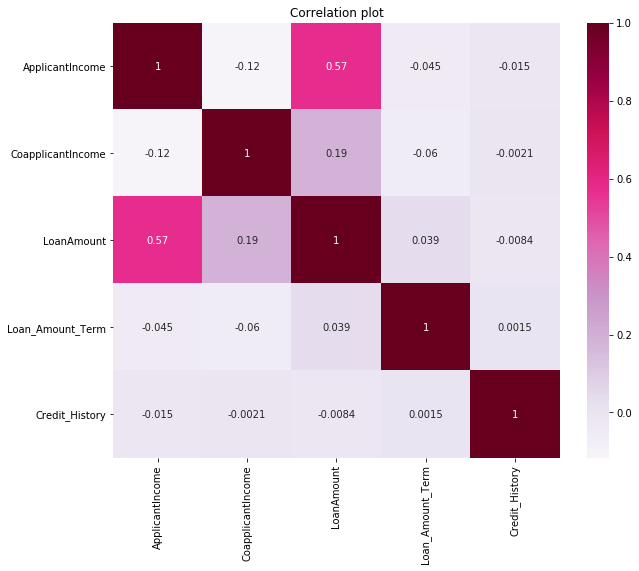

In [8]:
# correlation plot
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(),yticklabels=True,annot=True,cmap="PuRd")
plt.title("Correlation plot")

In [9]:
# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the loan_id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for Gender
Male      775
Female    182
Name: Gender, dtype: int64

Frequency of Categories for Married
Yes    631
No     347
Name: Married, dtype: int64

Frequency of Categories for Dependents
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

Frequency of Categories for Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64

Frequency of Categories for Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64

Frequency of Categories for Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

Frequency of Categories for Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


In [10]:
# replacing missing values
data['Gender'] = data.groupby('Education')['Gender'].transform(
    lambda group: group.fillna(mode(group).mode[0]))
data['Married'] = data.groupby('Education')['Married'].transform(
    lambda group: group.fillna(mode(group).mode[0]))
data['Dependents'] = data.groupby('Education')['Dependents'].transform(
    lambda group: group.fillna(mode(group).mode[0]))
data['Self_Employed'] = data.groupby('Gender')['Self_Employed'].transform(
    lambda group: group.fillna(mode(group).mode[0]))
data['LoanAmount'] = data.groupby('ApplicantIncome')['LoanAmount'].transform(
    lambda grp: grp.replace(0,np.mean(grp)))
data['LoanAmount'].fillna((data['LoanAmount'].mean()), inplace = True)
data['Loan_Amount_Term'] = data.groupby('LoanAmount')['Loan_Amount_Term'].transform(
    lambda grp: grp.fillna(np.mean(grp)))
data['Credit_History'].fillna(1, inplace = True)
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [11]:
# removing + from dependents variable values
data.Dependents=data.Dependents.apply(lambda x: x.strip('+'))
data.Dependents.value_counts()

0    570
2    160
1    160
3     91
Name: Dependents, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


# Exploratory Data Analysis

In [13]:
plt.rcParams["figure.figsize"] = (10,7)

Text(0.5, 1.0, 'Fig:0.1 Distribution of Applicant Income')

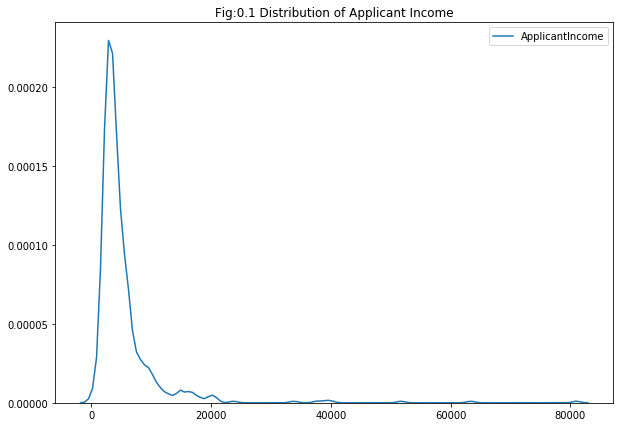

In [14]:
sns.kdeplot(train['ApplicantIncome']);
plt.title("Fig:0.1 Distribution of Applicant Income")

Text(0.5, 1.0, 'Fig:0.2 Distribution of Co applicant Income')

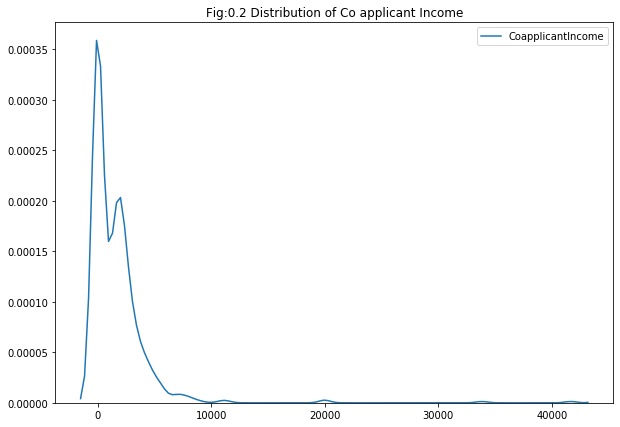

In [15]:
sns.kdeplot(train['CoapplicantIncome']);
plt.title("Fig:0.2 Distribution of Co applicant Income")

Text(0.5, 1.0, 'Fig:0.3 Distribution of Loan Amount')

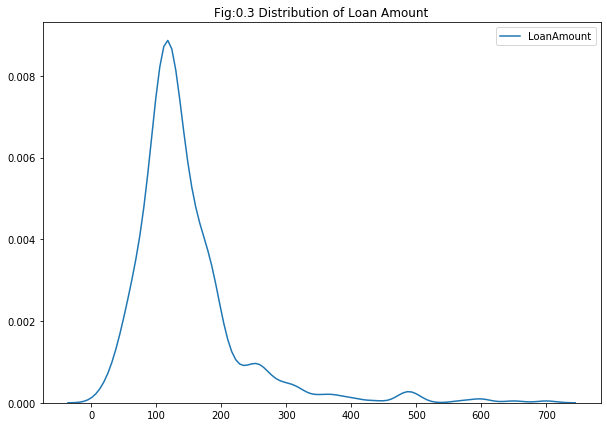

In [16]:
sns.kdeplot(train['LoanAmount'].dropna());
plt.title("Fig:0.3 Distribution of Loan Amount")

Text(0.5, 1.0, 'Fig:0.4 Distribution of Loan Amount Term')

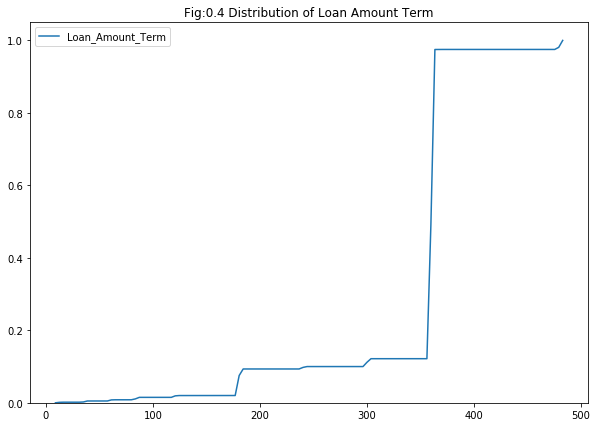

In [17]:
sns.kdeplot(train['Loan_Amount_Term'], cumulative=True, bw=1)
plt.title("Fig:0.4 Distribution of Loan Amount Term")

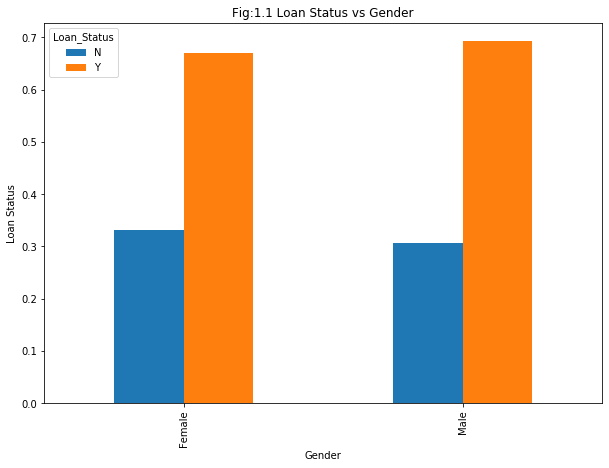

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [18]:
# plotting  Loan Status vs Gender graph
gender_graph= pd.crosstab(train["Gender"],train["Loan_Status"])
gender_graph.div(gender_graph.sum(1).astype(int),axis=0).plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Loan Status")
plt.title("Fig:1.1 Loan Status vs Gender")
plt.show()
gender_graph

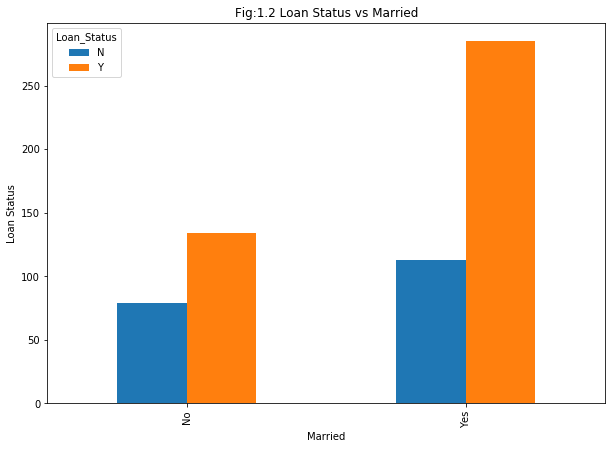

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [19]:
# plotting Loan Status vs Married graph
married_graph = pd.crosstab(train["Married"],train["Loan_Status"])
married_graph.plot(kind="bar")
plt.xlabel("Married")
plt.ylabel("Loan Status")
plt.title("Fig:1.2 Loan Status vs Married")
plt.show()
married_graph


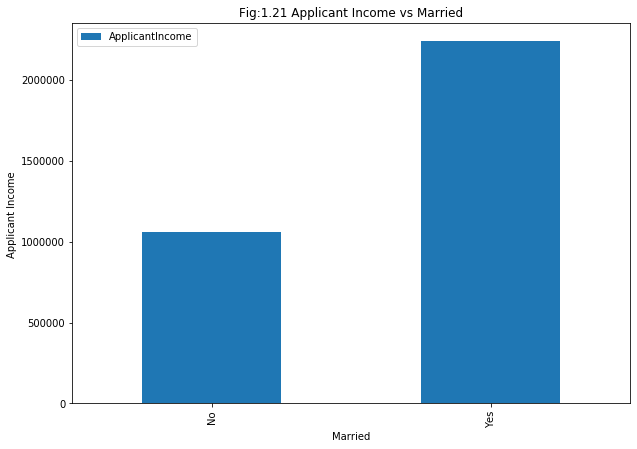

,ApplicantIncome
Married,
No,1058692
Yes,2240411


In [20]:
# plotting Applicant Income  vs Married graph
married_graph1 =train.pivot_table(index = 'Married',values = 'ApplicantIncome',aggfunc = np.sum)

married_graph1.plot(kind="bar")
plt.xlabel("Married")
plt.ylabel("Applicant Income ")
plt.title("Fig:1.21 Applicant Income vs Married")
plt.show()
married_graph1



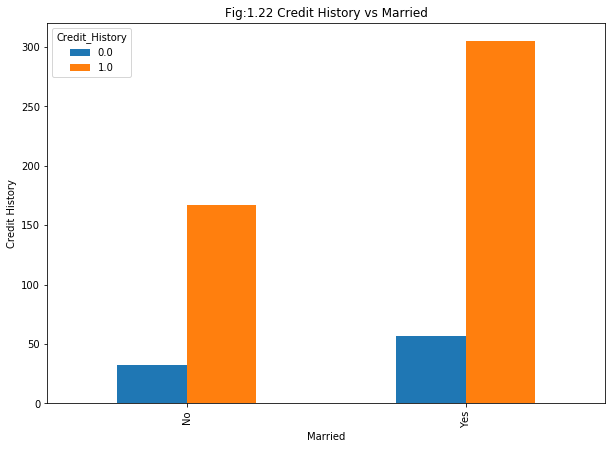

Credit_History,0.0,1.0
Married,,
No,32,167
Yes,57,305


In [21]:
# plotting Credit History vs Married graph
married_graph2 =pd.crosstab(train["Married"],train["Credit_History"])

married_graph2.plot(kind="bar")
plt.xlabel("Married")
plt.ylabel("Credit History")
plt.title("Fig:1.22 Credit History vs Married")
plt.show()
married_graph2


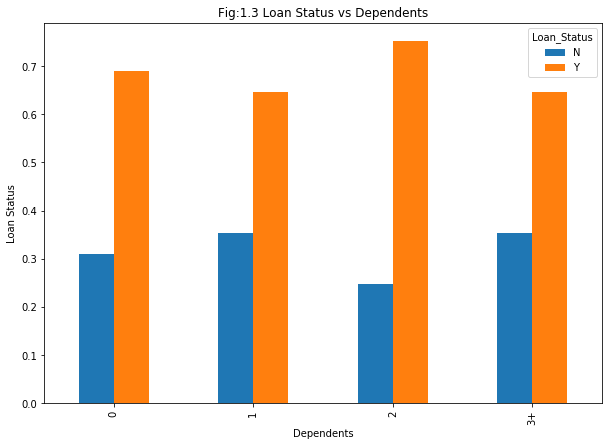

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [22]:
# plotting Loan Status vs Dependents graph
dependent_graph = pd.crosstab(train["Dependents"],train["Loan_Status"])
dependent_graph.div(dependent_graph.sum(1).astype(int),axis=0).plot(kind="bar")
plt.xlabel("Dependents")
plt.ylabel("Loan Status")
plt.title("Fig:1.3 Loan Status vs Dependents")
plt.show()
dependent_graph

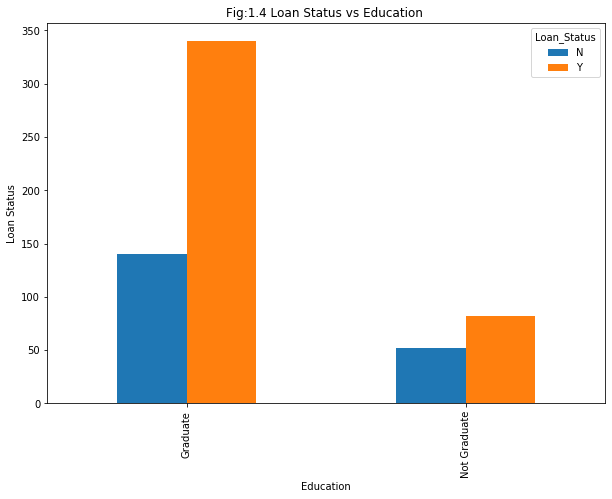

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [23]:
# plotting Loan Status vs Education graph
education_graph = pd.crosstab(train["Education"],train["Loan_Status"])
education_graph.plot(kind="bar")
plt.xlabel("Education")
plt.ylabel("Loan Status")
plt.title("Fig:1.4 Loan Status vs Education ")
plt.show()
education_graph
 

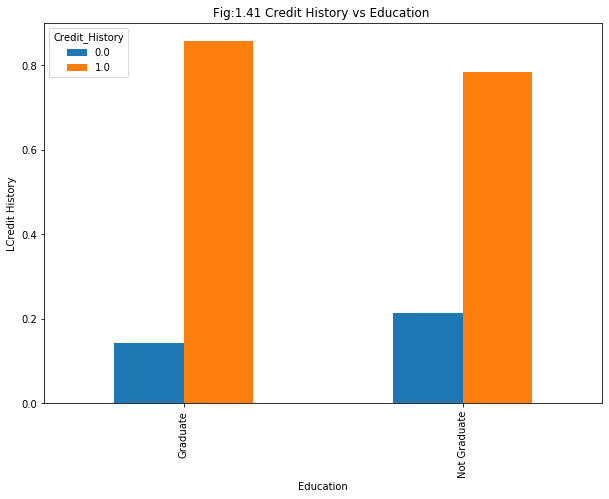

Credit_History,0.0,1.0
Education,,
Graduate,63,380
Not Graduate,26,95


In [24]:
# plotting Credit History vs Education graph
education_graph1 = pd.crosstab(train["Education"],train["Credit_History"])
education_graph1.div(education_graph1.sum(1).astype(int),axis=0).plot(kind="bar")
plt.xlabel("Education")
plt.ylabel("Credit History")
plt.title("Fig:1.41 Credit History vs Education ")
plt.show()
education_graph1


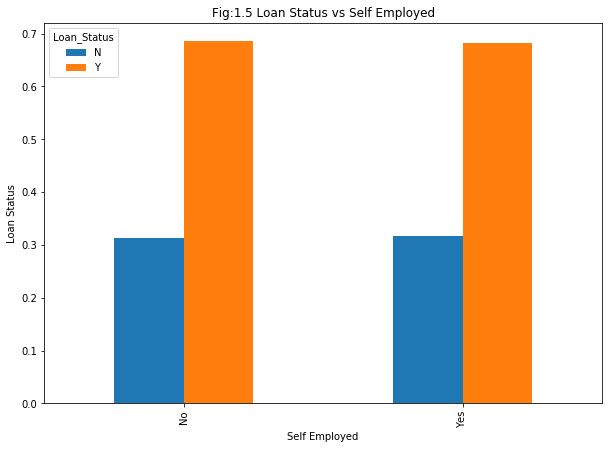

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [25]:
# plotting Loan Status vs Self Employed graph
selfemployed_graph = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
selfemployed_graph.div(selfemployed_graph.sum(1).astype(int),axis=0).plot(kind="bar")
plt.xlabel("Self Employed")
plt.ylabel("Loan Status")
plt.title("Fig:1.5 Loan Status vs Self Employed")
plt.show()
selfemployed_graph


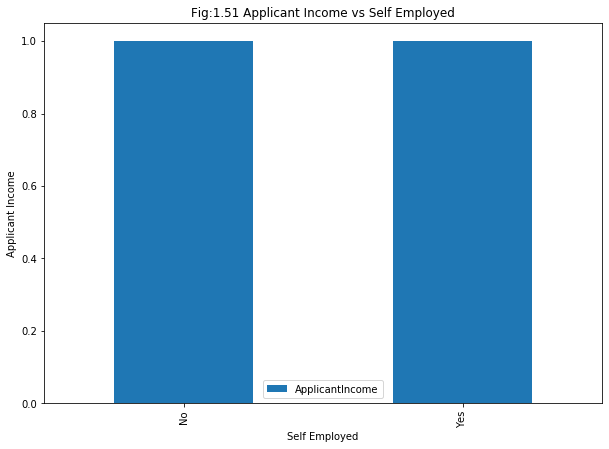

,ApplicantIncome
Self_Employed,
No,2524874
Yes,605227


In [26]:
# plotting Applicant Income vs Self Employed graph
selfemployed_graph1 =train.pivot_table(index = 'Self_Employed',values = 'ApplicantIncome',aggfunc = np.sum)
selfemployed_graph1.div(selfemployed_graph1.sum(1).astype(int),axis=0).plot(kind="bar")
plt.xlabel("Self Employed")
plt.ylabel("Applicant Income")
plt.title("Fig:1.51 Applicant Income vs Self Employed")
plt.show()
selfemployed_graph1


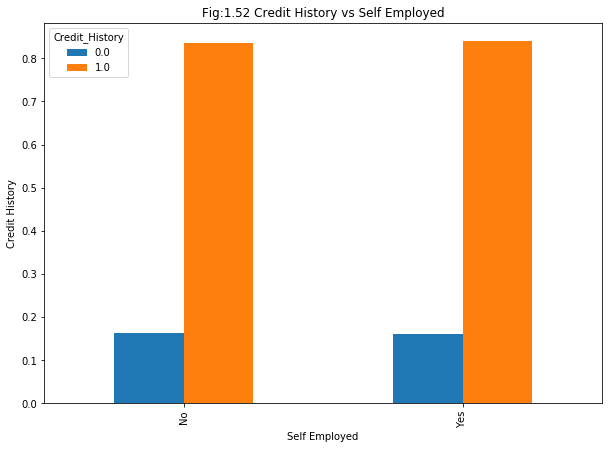

Credit_History,0.0,1.0
Self_Employed,,
No,76,387
Yes,12,63


In [27]:
# plotting Credit History vs Self Employed graph
selfemployed_graph2 =pd.crosstab(train["Self_Employed"],train["Credit_History"])
selfemployed_graph2.div(selfemployed_graph2.sum(1).astype(int),axis=0).plot(kind="bar")
plt.xlabel("Self Employed")
plt.ylabel("Credit History")
plt.title("Fig:1.52 Credit History vs Self Employed")
plt.show()
selfemployed_graph2


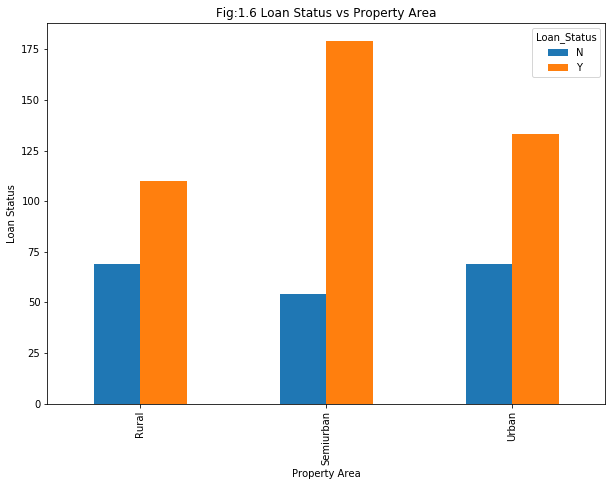

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [28]:
# plotting Loan Status vs Property Area graph
propertyarea_graph = pd.crosstab(train["Property_Area"],train["Loan_Status"])
propertyarea_graph.plot(kind="bar")
plt.xlabel("Property Area")
plt.ylabel("Loan Status")
plt.title("Fig:1.6 Loan Status vs Property Area")
plt.show()
propertyarea_graph

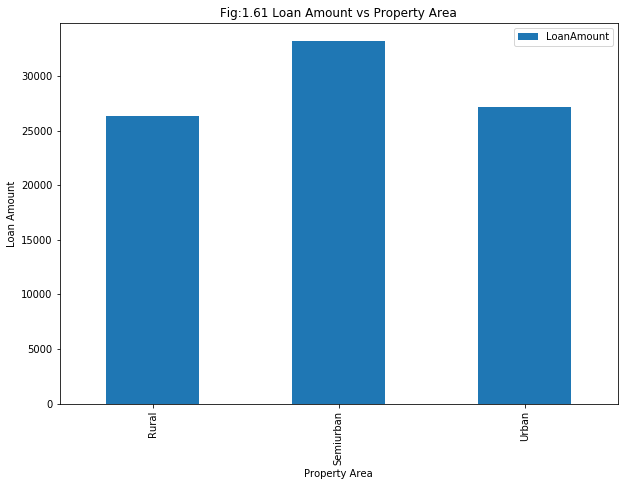

,LoanAmount
Property_Area,
Rural,26341.0
Semiurban,33175.0
Urban,27160.0


In [29]:
# plotting Loan Amount vs Property Area graph
propertyarea_graph1 = train.pivot_table(index = 'Property_Area',values = 'LoanAmount',aggfunc = np.sum)
propertyarea_graph1.plot(kind="bar")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.title("Fig:1.61 Loan Amount vs Property Area")
plt.show()
propertyarea_graph1



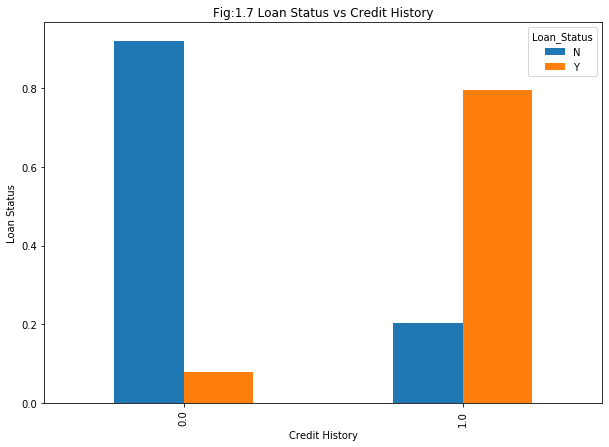

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [30]:
# plotting Loan Status vs Credit History graph
Credit_History_graph = pd.crosstab(train["Credit_History"],train["Loan_Status"])
Credit_History_graph.div(Credit_History_graph.sum(1).astype(int),axis=0).plot(kind="bar")
plt.xlabel("Credit History")
plt.ylabel("Loan Status")
plt.title("Fig:1.7 Loan Status vs Credit History")
plt.show()
Credit_History_graph

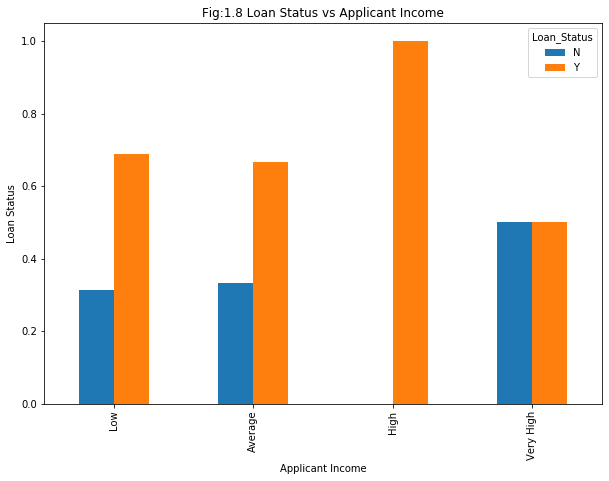

Loan_Status,N,Y
ApplicantIncome,,
Low,188,414
Average,3,6
High,0,1
Very High,1,1


In [31]:
# plotting Loan Status vs Applicant Income graph
ranges =[0,20000,40000,60000,81000]
groups=['Low','Average','High','Very High']
ApplicantIncome=pd.cut(train["ApplicantIncome"],ranges,labels=groups)

ApplicantIncome_graph = pd.crosstab(ApplicantIncome,train["Loan_Status"])
ApplicantIncome_graph.div(ApplicantIncome_graph.sum(1).astype(int),axis=0).plot(kind='bar')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Status")
plt.title("Fig:1.8 Loan Status vs Applicant Income")
plt.show()
ApplicantIncome_graph

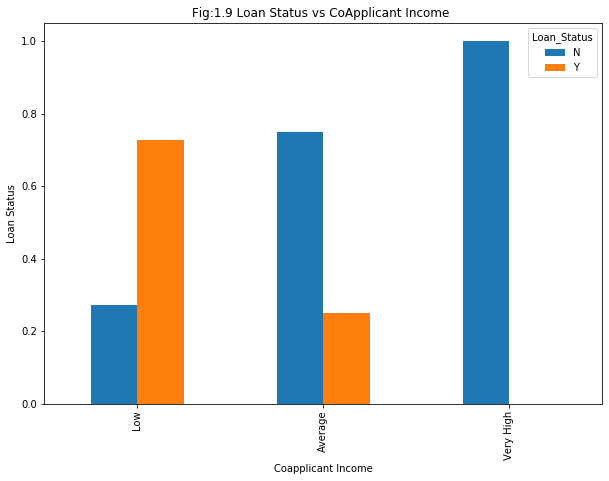

Loan_Status,N,Y
CoapplicantIncome,,
Low,91,244
Average,3,1
Very High,2,0


In [32]:
# plotting Loan Status vs CoApplicant Income graph
ranges =[0,10000,20000,30000,42000]
groups=['Low','Average','High','Very High']
CoapplicantIncome=pd.cut(train["CoapplicantIncome"],ranges,labels=groups)

CoapplicantIncome_graph = pd.crosstab(CoapplicantIncome,train["Loan_Status"])
CoapplicantIncome_graph.div(CoapplicantIncome_graph.sum(1).astype(int),axis=0).plot(kind='bar')
plt.xlabel("Coapplicant Income")
plt.ylabel("Loan Status")
plt.title("Fig:1.9 Loan Status vs CoApplicant Income ")
plt.show()
CoapplicantIncome_graph

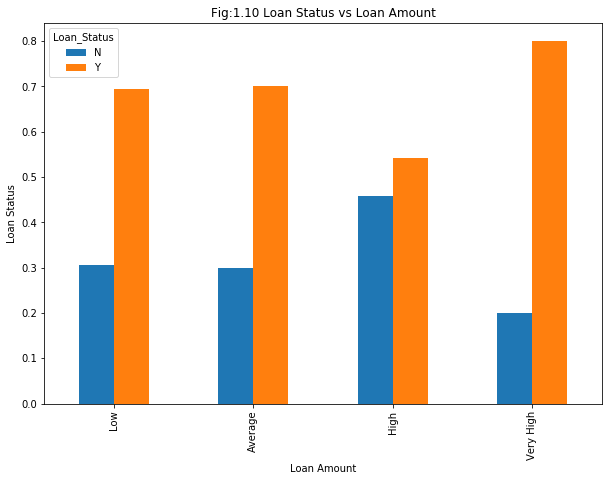

Loan_Status,N,Y
LoanAmount,,
Low,47,107
Average,122,287
High,11,13
Very High,1,4


In [33]:
# plotting Loan Status vs Loan Amount graph
ranges =[0,100,300,500,700]
groups=['Low','Average','High','Very High']
LoanAmount=pd.cut(train["LoanAmount"],ranges,labels=groups)

LoanAmount_graph = pd.crosstab(LoanAmount,train["Loan_Status"])
LoanAmount_graph.div(LoanAmount_graph.sum(1).astype(int),axis=0).plot(kind='bar')
plt.xlabel("Loan Amount")
plt.ylabel("Loan Status")
plt.title("Fig:1.10 Loan Status vs Loan Amount")
plt.show()
LoanAmount_graph

# Categorical Data Encoding and Feature Scaling

In [34]:
# encoding categorical data
data = pd.get_dummies(data, columns=['Gender','Married', 'Education',  'Self_Employed', 
       'Property_Area'],drop_first=True)
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,source,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,142.51153,360.0,1.0,Y,train,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,128.00000,360.0,1.0,N,train,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.00000,360.0,1.0,Y,train,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.00000,360.0,1.0,Y,train,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.00000,360.0,1.0,Y,train,1,0,0,0,0,1


In [35]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [36]:
warnings.filterwarnings('ignore')

# Divide into test and train datasets
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

# Drop unnecessary columns
train.drop(['source'],axis=1,inplace=True)
test.drop(['Loan_Status','source'],axis=1,inplace=True)
trainX = train.drop(['Loan_Status'], axis=1)
trainY = train.Loan_Status

In [37]:
# encoding the target variable
le = LabelEncoder()
trainY = le.fit_transform(trainY)
trainY=pd.DataFrame(trainY)
trainY.head()

,0
0,1
1,0
2,1
3,1
4,1


In [38]:
# creating a dataframe consisting of column names
xcol_names=list(trainX.columns)
xcol_names=pd.DataFrame(xcol_names,columns=['Independent Variables'])
xcol_names

,Independent Variables
0,Dependents
1,ApplicantIncome
2,CoapplicantIncome
3,LoanAmount
4,Loan_Amount_Term
5,Credit_History
6,Gender_Male
7,Married_Yes
8,Education_Not Graduate
9,Self_Employed_Yes


In [39]:
# normalizing the variables
sc_X = RobustScaler()
X = sc_X.fit_transform(trainX)
testX = sc_X.fit_transform(test)

In [40]:
# creating dataframes of x and y datasets
x=pd.DataFrame(data=X)

# Model Building

In [41]:
# splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, trainY, test_size = 0.25, random_state = 0)

In [42]:
#logistic regression model
logmodel = LogisticRegression(random_state=0)
logmodel.fit(X_train, y_train)

log_pred = logmodel.predict(X_test)
acc1=accuracy_score(y_test,log_pred)*100
acc1

83.76623376623377

In [43]:
def  model_analysis(y_test,pred):
    print(classification_report(y_test,pred))
    print("\n")
    print(confusion_matrix(y_test,pred))
    

In [44]:
model_analysis(y_test,log_pred)

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



[[ 20  23]
 [  2 109]]


In [45]:
# plotting roc curve
probs=logmodel.predict_proba(X_test)
probs

array([[0.1586147 , 0.8413853 ],
       [0.17180208, 0.82819792],
       [0.29688619, 0.70311381],
       [0.22693023, 0.77306977],
       [0.1186728 , 0.8813272 ],
       [0.9411576 , 0.0588424 ],
       [0.17009397, 0.82990603],
       [0.21128304, 0.78871696],
       [0.91130269, 0.08869731],
       [0.16487013, 0.83512987],
       [0.16844354, 0.83155646],
       [0.1240541 , 0.8759459 ],
       [0.19963958, 0.80036042],
       [0.15655128, 0.84344872],
       [0.11876938, 0.88123062],
       [0.17692128, 0.82307872],
       [0.26930753, 0.73069247],
       [0.27133004, 0.72866996],
       [0.25606615, 0.74393385],
       [0.93312657, 0.06687343],
       [0.89867006, 0.10132994],
       [0.16025602, 0.83974398],
       [0.21241418, 0.78758582],
       [0.23824933, 0.76175067],
       [0.25015119, 0.74984881],
       [0.1576334 , 0.8423666 ],
       [0.23200388, 0.76799612],
       [0.19355413, 0.80644587],
       [0.76755996, 0.23244004],
       [0.84171822, 0.15828178],
       [0.

In [46]:

prob_positive=probs[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("area under curve ",roc_auc)

area under curve  0.7969830295411691


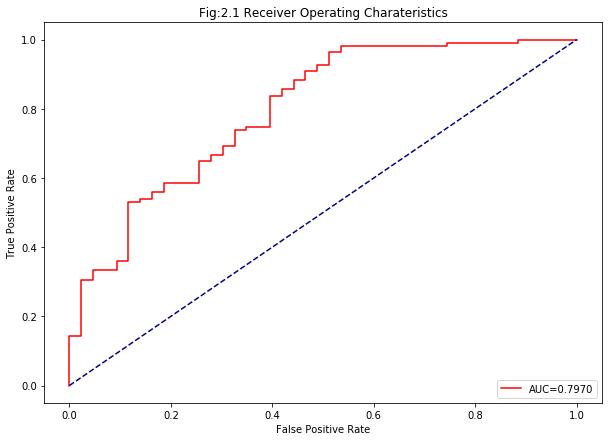

In [47]:
plt.title("Fig:2.1 Receiver Operating Charateristics")
plt.plot(fpr,tpr,'red',label='AUC=%0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color="darkblue",linestyle= '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
# k nearest neighbors classifier model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

accuracy_score(y_test,knn_pred)

0.7987012987012987

[0    0.25974
dtype: float64, 0    0.37013
dtype: float64, 0    0.214286
dtype: float64, 0    0.233766
dtype: float64, 0    0.201299
dtype: float64, 0    0.233766
dtype: float64, 0    0.220779
dtype: float64, 0    0.227273
dtype: float64, 0    0.201299
dtype: float64, 0    0.220779
dtype: float64, 0    0.25974
dtype: float64, 0    0.246753
dtype: float64, 0    0.272727
dtype: float64, 0    0.272727
dtype: float64, 0    0.279221
dtype: float64, 0    0.279221
dtype: float64, 0    0.279221
dtype: float64, 0    0.279221
dtype: float64, 0    0.272727
dtype: float64, 0    0.272727
dtype: float64, 0    0.266234
dtype: float64, 0    0.25974
dtype: float64, 0    0.272727
dtype: float64, 0    0.279221
dtype: float64, 0    0.272727
dtype: float64, 0    0.272727
dtype: float64, 0    0.272727
dtype: float64, 0    0.279221
dtype: float64, 0    0.272727
dtype: float64, 0    0.272727
dtype: float64, 0    0.272727
dtype: float64, 0    0.279221
dtype: float64, 0    0.272727
dtype: float64, 0    0.272727

Text(0, 0.5, 'Error Rate')

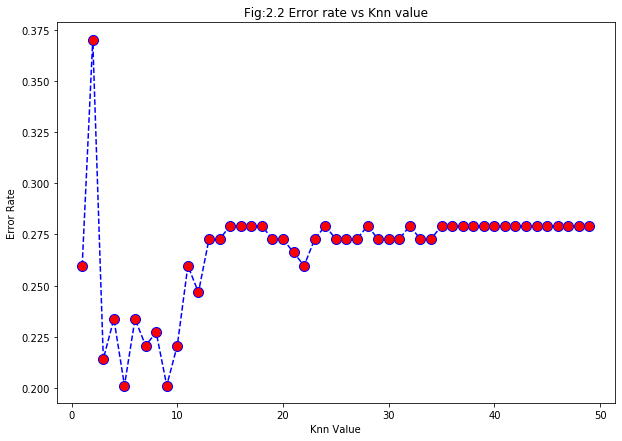

In [49]:
#plotting error rate vs k nearest neighbors values
error_rate=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    pred_i=pred_i.reshape(154,1)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate)
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Fig:2.2 Error rate vs Knn value')
plt.xlabel('Knn Value')
plt.ylabel('Error Rate')

In [50]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

acc2=accuracy_score(y_test,knn_pred)*100
acc2

72.07792207792207

In [51]:
model_analysis(y_test,knn_pred)

              precision    recall  f1-score   support

           0       0.50      0.14      0.22        43
           1       0.74      0.95      0.83       111

    accuracy                           0.72       154
   macro avg       0.62      0.54      0.52       154
weighted avg       0.67      0.72      0.66       154



[[  6  37]
 [  6 105]]


In [52]:
# support vector classifier model
svc = SVC(random_state=0,kernel='rbf',C=1000)
svc.fit(X_train, y_train)

svc_pred =svc.predict(X_test)

acc3=accuracy_score(y_test,svc_pred)*100
acc3


83.76623376623377

In [53]:
model_analysis(y_test,svc_pred)

              precision    recall  f1-score   support

           0       0.85      0.51      0.64        43
           1       0.84      0.96      0.90       111

    accuracy                           0.84       154
   macro avg       0.84      0.74      0.77       154
weighted avg       0.84      0.84      0.82       154



[[ 22  21]
 [  4 107]]


In [54]:
# naive bayes classifier model
naive= GaussianNB(var_smoothing=0)
naive.fit(X_train, y_train)

naive_pred =naive.predict(X_test)

acc4=accuracy_score(y_test,naive_pred)*100
acc4


82.46753246753246

In [55]:
model_analysis(y_test,naive_pred)

              precision    recall  f1-score   support

           0       0.83      0.47      0.60        43
           1       0.82      0.96      0.89       111

    accuracy                           0.82       154
   macro avg       0.83      0.71      0.74       154
weighted avg       0.83      0.82      0.81       154



[[ 20  23]
 [  4 107]]


In [56]:
# decision tree classifier model
params = {'max_leaf_nodes': list(range(2,10)),
          'min_samples_leaf':np.arange(2,10),
              'min_samples_split':np.arange(2,10),
              'max_depth':np.arange(3,7),
              'criterion':['gini','entropy']}
tree_model = GridSearchCV(DecisionTreeClassifier(splitter='random',random_state=0,max_features='auto'), params,n_jobs=-1,scoring='accuracy')
tree_model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0,
                                              splitter='random'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                 

In [57]:
print("Tree best parameters :",tree_model.best_params_)
print("Tree best estimator :",tree_model.best_estimator_ )
print("Tree best score :",tree_model.best_score_ )

Tree best parameters : {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tree best estimator : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')
Tree best score : 0.8065217391304348


In [58]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')
dt.fit(X_train, y_train)

dt_pred =dt.predict(X_test)

acc5=accuracy_score(y_test,dt_pred)*100
acc5


83.11688311688312

In [59]:
model_analysis(y_test,dt_pred)

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



[[ 19  24]
 [  2 109]]


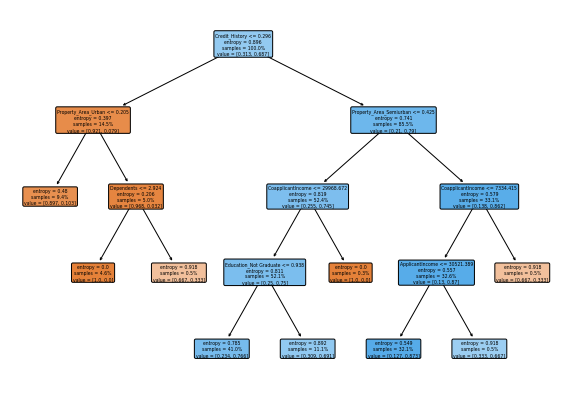

In [60]:
# plotting decision classifier tree
cols=list(trainX.columns.values)
from sklearn import tree
from matplotlib import pyplot as plt
tree.plot_tree(dt.fit(trainX,trainY),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

In [61]:
# ada boost classifier model
params = {'n_estimators': list(range(20,50)),
          'learning_rate':np.arange(0.1,10.0),
          'algorithm':['SAMME', 'SAMME.R']}
nb_model = GridSearchCV(AdaBoostClassifier(random_state=30), params,n_jobs=-1,scoring='accuracy')
nb_model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=30),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1]),
                         'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          29, 30, 31, 32, 33, 34, 35, 36, 37,
                                          38, 39, 40, 41, 42, 43, 44, 45, 46,
                                          47, 48, 49]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [62]:
print("Ada Boost best parameters :",nb_model.best_params_)
print("Ada Boost best estimator :",nb_model.best_estimator_ )
print("Ada Boost best score :",nb_model.best_score_ )

Ada Boost best parameters : {'algorithm': 'SAMME', 'learning_rate': 1.1, 'n_estimators': 34}
Ada Boost best estimator : AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.1,
                   n_estimators=34, random_state=30)
Ada Boost best score : 0.808695652173913


In [63]:
abc = AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.1,
                   n_estimators=34, random_state=3)
abc.fit(X_train, y_train)

abc_pred =abc.predict(X_test)

acc6=accuracy_score(y_test,abc_pred)*100
acc6

83.11688311688312

In [64]:
model_analysis(y_test,abc_pred)

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



[[ 19  24]
 [  2 109]]


In [65]:
# random forest classifeir model
params = {'n_estimators':np.arange(3,20,2),
              'max_depth':np.arange(3,7), 
          'min_samples_split':np.arange(3,7),
          'max_features':['auto',  'log2'],
          'min_weight_fraction_leaf':np.arange(0,0.5,0.1),
              'criterion':['gini','entropy']}
forest_model = GridSearchCV(RandomForestClassifier(random_state=0), params,n_jobs=-1, scoring='accuracy')

forest_model.fit(X_train, y_train)

print("Random Forest best parameters :",forest_model.best_params_)
print("Random Forest best estimator :",forest_model.best_estimator_ )
print("Random Forest best score :",forest_model.best_score_ )


Random Forest best parameters : {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5}
Random Forest best estimator : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Random Forest best score : 0.8130434782608698


In [66]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
rf.fit(X_train, y_train)
rf_pred =rf.predict(X_test)

acc7=accuracy_score(y_test,rf_pred)*100
acc7

83.11688311688312

In [67]:
model_analysis(y_test,rf_pred)

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



[[ 19  24]
 [  2 109]]


In [68]:
#xgboost classifier model
xgb = XGBClassifier(n_estimators=100,max_depth=2)
xgb.fit(X_train,y_train)
pred_xgb=xgb.predict(X_test)

acc8= accuracy_score(y_test,pred_xgb)*100
acc8

81.81818181818183

In [69]:
model_analysis(y_test,pred_xgb)

              precision    recall  f1-score   support

           0       0.78      0.49      0.60        43
           1       0.83      0.95      0.88       111

    accuracy                           0.82       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.81      0.82      0.80       154



[[ 21  22]
 [  6 105]]


# Feature Importance

In [83]:
# creating a dataframe consisting of accuracy score values
metrics_df=pd.DataFrame(columns=['metrics','Logistic reg','knn','svc','naive bayes','decision tree','adaboost','random forest','xgboost'])
metrics_df=metrics_df.append({'metrics': "Accuracy Score ", 'Logistic reg': acc1 ,'knn':acc2,'svc':acc3,'naive bayes':acc4,'decision tree':acc5,'adaboost':acc6,'random forest':acc7,'xgboost':acc8}, ignore_index=True)
metrics_df

,metrics,Logistic reg,knn,svc,naive bayes,decision tree,adaboost,random forest,xgboost
0,Accuracy Score,83.766234,72.077922,83.766234,82.467532,83.116883,83.116883,83.116883,81.818182


In [70]:
#finding the important feaures
feature_imp=pd.Series(rf.feature_importances_,index=trainX.columns).sort_values(ascending=False)
feature_imp

Credit_History             0.542654
ApplicantIncome            0.124603
LoanAmount                 0.101993
CoapplicantIncome          0.079368
Dependents                 0.034756
Property_Area_Semiurban    0.030094
Loan_Amount_Term           0.026311
Self_Employed_Yes          0.013256
Property_Area_Urban        0.013148
Education_Not Graduate     0.013143
Married_Yes                0.012439
Gender_Male                0.008236
dtype: float64

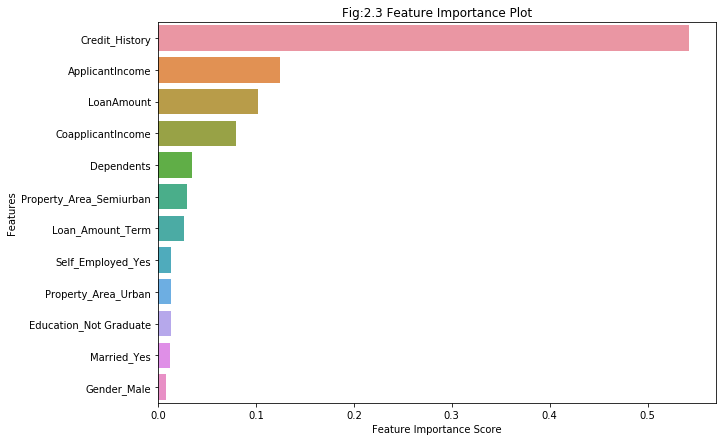

In [71]:
#plotting the important features
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.title("Fig:2.3 Feature Importance Plot")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

In [80]:
#building model with important features
fea_sel=SelectFromModel(logmodel,threshold=0.1)
fea_sel.fit(X_train,y_train)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=0, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.1)

In [73]:
x_imp_train=fea_sel.transform(X_train)
x_imp_test=fea_sel.transform(X_test)


In [81]:
clf_imp=LogisticRegression(random_state=0)
clf_imp.fit(x_imp_train, y_train)
y_pred1 =clf_imp.predict(x_imp_test)


acc9=print(accuracy_score(y_test, y_pred1)*100)

83.11688311688312


In [82]:
model_analysis(y_test,y_pred1)

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



[[ 19  24]
 [  2 109]]


In [86]:
clf_imp1=SVC(random_state=0,kernel='rbf',C=1000)
clf_imp1.fit(x_imp_train, y_train)
y_pred2 =clf_imp1.predict(x_imp_test)

acc10=print(accuracy_score(y_test, y_pred2)*100)

83.11688311688312


In [87]:
model_analysis(y_test,y_pred2)

              precision    recall  f1-score   support

           0       0.84      0.49      0.62        43
           1       0.83      0.96      0.89       111

    accuracy                           0.83       154
   macro avg       0.83      0.73      0.75       154
weighted avg       0.83      0.83      0.82       154



[[ 21  22]
 [  4 107]]


# Predicting Test Data

In [77]:
# fitting the best model on test dataset
log_test=(logmodel.predict(testX))
svc_test=(svc.predict(testX))

df_test=pd.DataFrame(columns=['Logistic reg','svc'])
for i in range(len(log_test)):
    df_test=df_test.append({'Logistic reg':log_test[i],  'svc':svc_test[i]}, ignore_index=True)
print(df_test)


    Logistic reg svc
0              1   1
1              1   1
2              1   1
3              1   1
4              1   1
..           ...  ..
362            1   1
363            1   1
364            1   1
365            1   1
366            1   1

[367 rows x 2 columns]


In [78]:
# predicted values that don't coincide
print(df_test[df_test['Logistic reg'].values!= df_test['svc'].values])

    Logistic reg svc
84             0   1
101            0   1
144            1   0
200            1   0
216            1   0
222            1   0
239            1   0
250            0   1
